In [2]:
import torch
import torch.nn.functional as F

def resize_with_padding(image, target_size=640):
    # Convert to float32 if not already
    if image.dtype != torch.float32:
        image = image.float()

    # Get current dimensions
    height, width = image.shape[:2]

    # Calculate new dimensions while maintaining aspect ratio
    ratio = target_size / max(height, width)
    new_height = int(height * ratio)
    new_width = int(width * ratio)

    # Resize the image
    resized_image = F.interpolate(image.unsqueeze(0).permute(0, 3, 1, 2), size=(new_height, new_width), mode='bilinear', align_corners=False).squeeze(0).permute(1, 2, 0)

    # Calculate padding
    pad_height = target_size - new_height
    pad_width = target_size - new_width

    # Add padding
    padding = [
        pad_width // 2, pad_width - pad_width // 2,  # Left, Right
        pad_height // 2, pad_height - pad_height // 2  # Top, Bottom
    ]

    padded_image = F.pad(resized_image.permute(2, 0, 1), padding, mode='constant', value=0).permute(1, 2, 0)

    return padded_image

In [6]:
import cv2
import torch
from torchvision import transforms

def resize_image(image_path, target_size):
    # Read the image using OpenCV
    image = cv2.imread(image_path)
    
    # Convert the image from BGR to RGB format
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Get original dimensions
    original_height, original_width = image.shape[:2]
    
    # Calculate the aspect ratio
    aspect_ratio = original_width / original_height
    
    # Determine new dimensions while maintaining aspect ratio
    if aspect_ratio > 1:  # Wider than tall
        new_width = target_size
        new_height = int(target_size / aspect_ratio)
    else:  # Taller than wide
        new_height = target_size
        new_width = int(target_size * aspect_ratio)
    
    # Resize the image using OpenCV
    resized_image = cv2.resize(image, (new_width, new_height))
    
    # Convert the resized image to a PyTorch tensor
    image_tensor = transforms.ToTensor()(resized_image)
    
    return image_tensor



ImportError: libGL.so.1: cannot open shared object file: No such file or directory

In [5]:
from PIL import Image
import numpy
img = numpy.asarray(Image.open('/workspaces/ai-capstone-proj/examples/image_0000005.jpg'))

img = resize_image('/workspaces/ai-capstone-proj/examples/image_0000005.jpg', 640)


NameError: name 'resize_image' is not defined

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..240.77338].


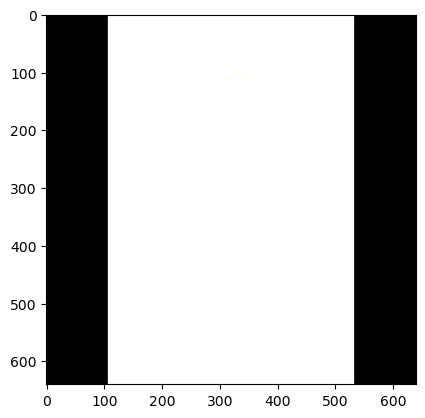

In [4]:
import matplotlib.pyplot as plt

plt.imshow(img)


In [3]:
import os
os.path.exists('/workspaces/ai-capstone-proj/examples/image_0000005.jpg')

True